In [6]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Read the data
iris = pd.read_csv('./iris.csv')
iris = iris.drop('Id', axis=1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [10]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
from scipy.stats import iqr

numerical_variables = iris.columns[iris.columns!='Species']

print('Variable Range')
for c in numerical_variables:
    print('%s\t%.3f'%(c,np.max(iris[c]) - np.min(iris[c])))

print('\n\nInterquartile Range')
for c in numerical_variables:
    print('%s\t%.3f'%(c,iqr(iris[c])))

Variable Range
SepalLengthCm	3.600
SepalWidthCm	2.400
PetalLengthCm	5.900
PetalWidthCm	2.400


Interquartile Range
SepalLengthCm	1.300
SepalWidthCm	0.500
PetalLengthCm	3.500
PetalWidthCm	1.500


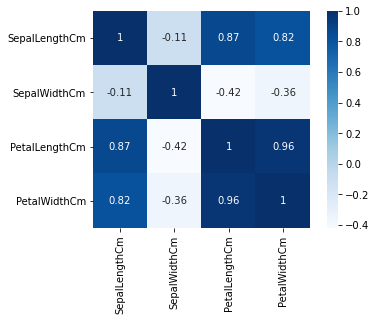

In [12]:
cov=iris.corr(method='pearson')
sns.heatmap(cov,square=True,annot=True,cmap="Blues");

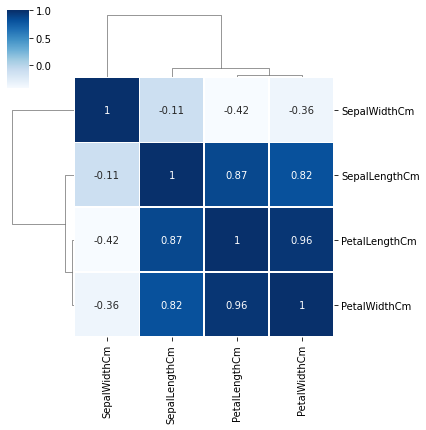

In [13]:
sns.clustermap(iris.corr(), square=True, annot=True, cmap="Blues", linewidths=.75, figsize=(6, 6));

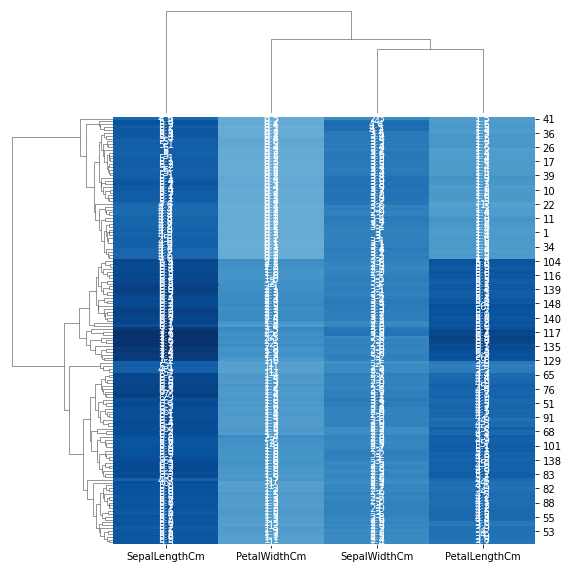

In [14]:
cm = sns.clustermap(iris[numerical_variables], annot=False, center=0, cmap="Blues", figsize=(8, 8))
cm.cax.set_visible(False)

No handles with labels found to put in legend.


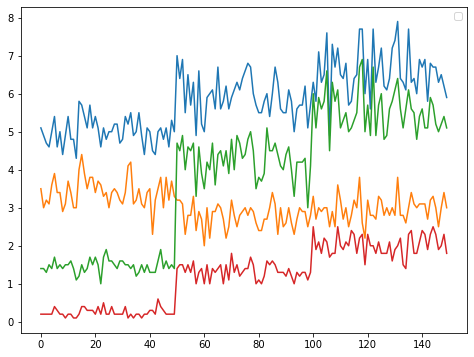

In [15]:
plt.figure(figsize=(8,6))
plt.plot(iris['SepalLengthCm'])
plt.plot(iris['SepalWidthCm'])
plt.plot(iris['PetalLengthCm'])
plt.plot(iris['PetalWidthCm'])
plt.legend(loc='best');

<Figure size 864x648 with 0 Axes>

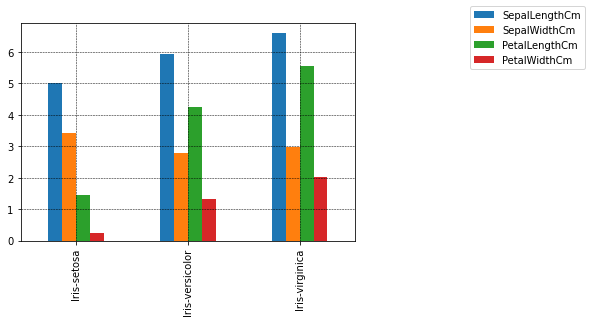

In [16]:
plt.figure(figsize=(12, 9));
# sns.set_context("poster", font_scale=.8, rc={"lines.linewidth": 2.5})
sns.set_context(font_scale=.8, rc={"lines.linewidth": 2.5});
iris_gb=iris.groupby(['Species']).mean();
iris_gb.plot(kind='bar');
plt.grid(color='black', linestyle='--', linewidth=.5);
plt.yticks(np.arange(0, 7, step=1.0));
plt.xlabel("");
# plt.tight_layout()
plt.legend(loc='upper right',bbox_to_anchor=(1.7, 1.1));

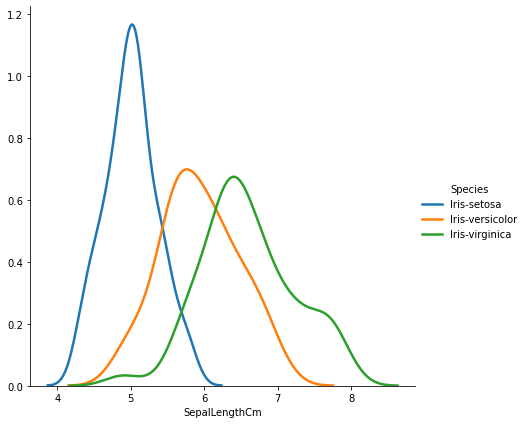

In [17]:
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "SepalLengthCm") \
   .add_legend();

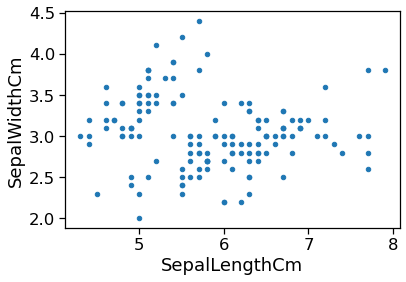

In [18]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm");

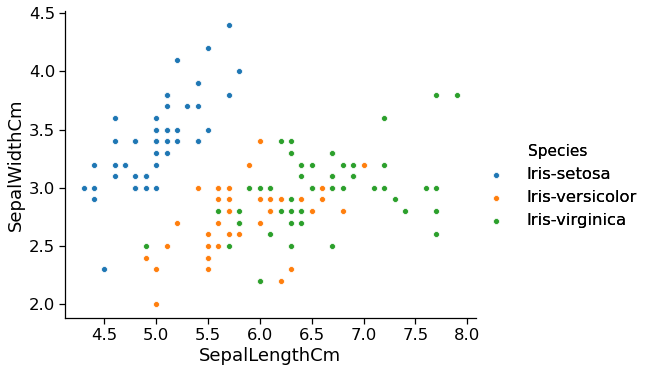

In [19]:
sns.pairplot(iris, x_vars=["SepalLengthCm"], y_vars=["SepalWidthCm"], hue="Species", size=5) \
   .add_legend();

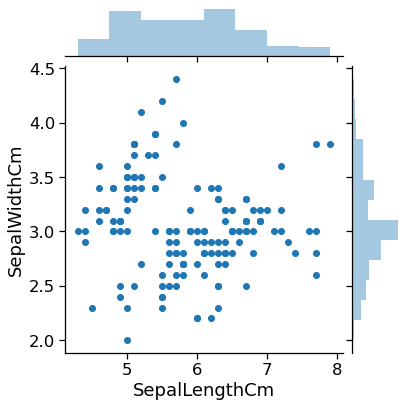

In [20]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=6);

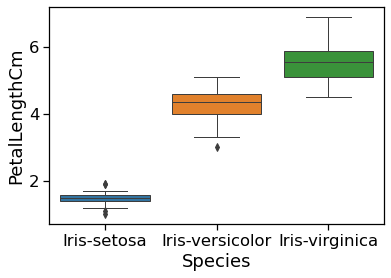

In [21]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

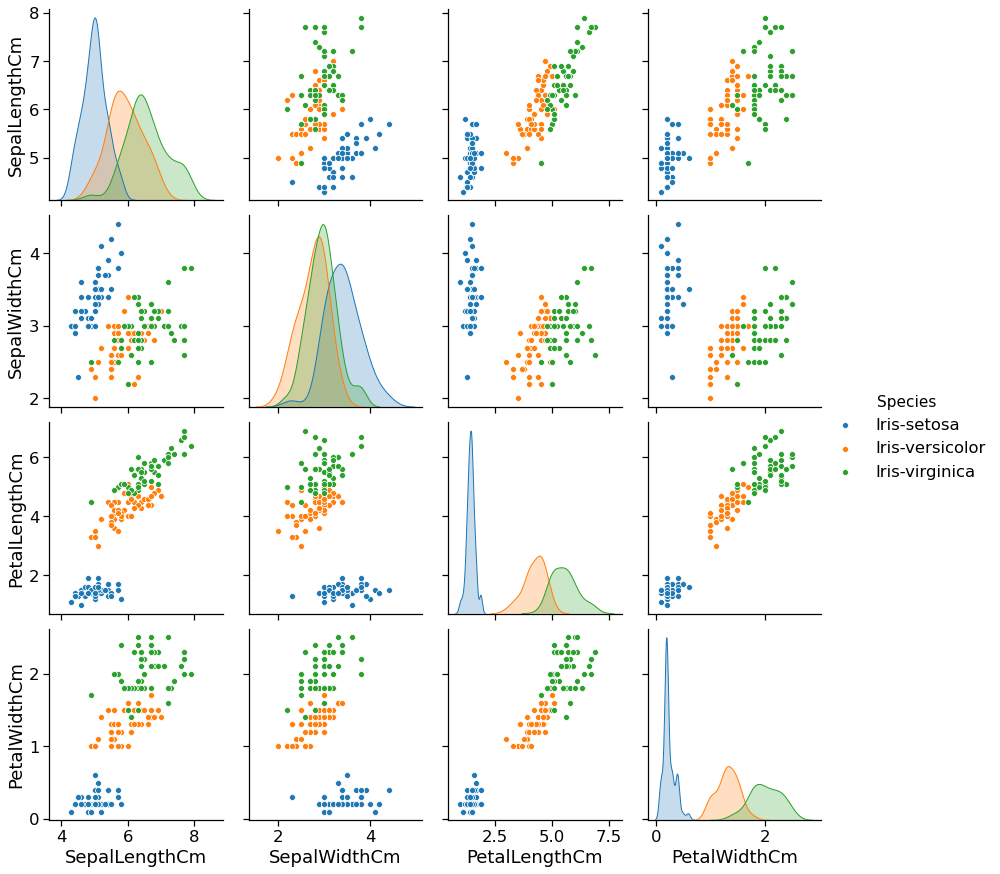

In [23]:
sns.pairplot(iris, hue="Species", size=3, diag_kind="kde");

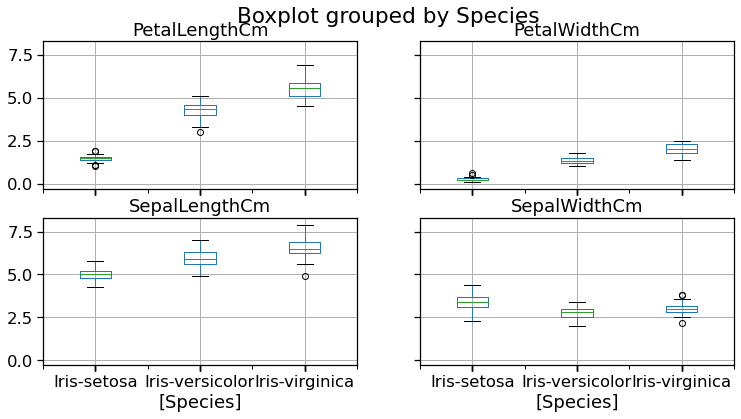

In [24]:
iris.boxplot(by="Species", figsize=(12, 6));

# PCA 

Principal component analysis (PCA) is affected by attribute scale so we normalize all the attributes by eliminating the mean and scaling to unit variance.

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = iris.loc[:, numerical_variables].values
y = iris.loc[:,['Species']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
new_data = pca.fit_transform(x)
pca_iris = pd.DataFrame(data = new_data, 
                        columns = ['principal component 1', 'principal component 2'])

pca_iris_complete = pca_iris
pca_iris_complete['Species'] = iris[['Species']]

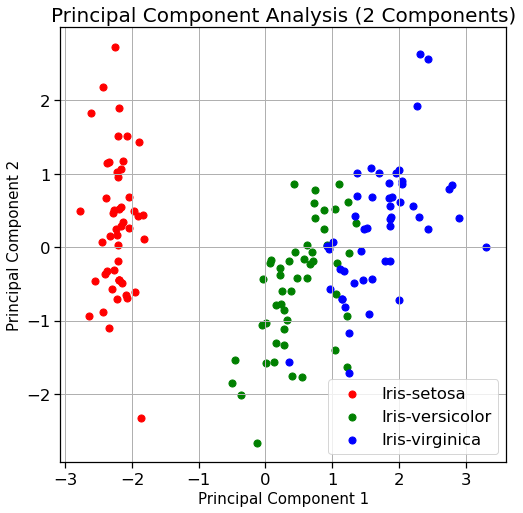

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal Component Analysis (2 Components)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_iris_complete['Species'] == target
    ax.scatter(pca_iris_complete.loc[indicesToKeep, 'principal component 1']
               , pca_iris_complete.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [27]:
print("Explained Variance")
print("   Component 1 %3.2f"%(pca.explained_variance_ratio_[0]))
print("   Component 2 %3.2f"%(pca.explained_variance_ratio_[1]))
print("   Total Explained Variance %3.2f"%sum(pca.explained_variance_ratio_))

Explained Variance
   Component 1 0.73
   Component 2 0.23
   Total Explained Variance 0.96


In [28]:
print("Components")
for i,c in enumerate(pca.components_):
    print("Component %d\t%s"%(i,str(c)))

Components
Component 0	[ 0.52237162 -0.26335492  0.58125401  0.56561105]
Component 1	[0.37231836 0.92555649 0.02109478 0.06541577]


In [29]:
data = np.dot(x,np.transpose(pca.components_))
data[:5,:]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [30]:
pca_iris.head(5)

,principal component 1,principal component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [31]:
x = iris.loc[:, numerical_variables].values
y = iris.loc[:,['Species']].values
full_pca = PCA()
fitted = full_pca.fit_transform(x)
full_pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

# t - SNE

In [32]:
from sklearn.manifold import TSNE

perplexity=80
tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300, random_state=2867976)
tsne_result = tsne.fit_transform(x)

[t-SNE] Computing 149 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.001s...
[t-SNE] Computed neighbors for 150 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 1.545675
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.676804
[t-SNE] KL divergence after 300 iterations: 0.027867


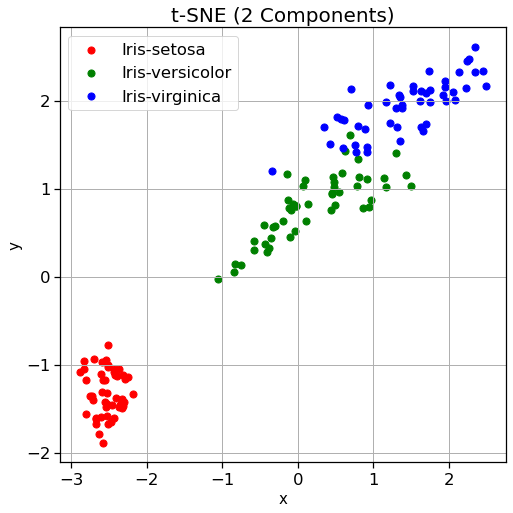

In [33]:
iris_tsne = pd.DataFrame({'x':tsne_result[:,0], 'y':tsne_result[:,1], 'Species':iris['Species']})

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_title('t-SNE (2 Components)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = iris_tsne['Species'] == target
    ax.scatter(iris_tsne.loc[indicesToKeep,'x'], iris_tsne.loc[indicesToKeep,'y'], c=color, s=50)
ax.legend(targets)
ax.grid()